In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
from utils import load_csv, load_images, fill_na, plot_landmark, plot_landmark_single

In [5]:
images = load_images()
images.shape

/home/jupyteruser/utils.py:7: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  images = np.moveaxis(data_np['face_images'], -1,0)


(7049, 96, 96)

In [6]:
faces_df = load_csv()
faces_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


/home/jupyteruser/utils.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points_df.iloc[idx][0: -1: 2], points_df.iloc[idx][1: : 2], cmap='y')


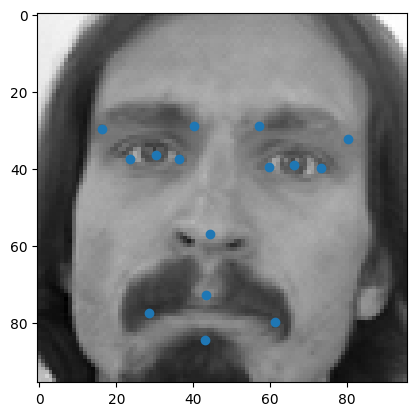

In [7]:
plot_landmark(0, images, faces_df)

In [8]:
len(faces_df)

7049

In [9]:
faces_df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [10]:
fill_na(faces_df)
faces_df.isna().sum()

/home/jupyteruser/utils.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [11]:
X = images
y = faces_df.to_numpy()

In [12]:
X.dtype

dtype('float64')

In [13]:
y.dtype

dtype('float64')

In [5]:
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [15]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [16]:
class FacialFeatures(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 2)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(128, 64, 3)
        self.batch_norm = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(20 *32 * 32, 31)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 30)
        
    def forward(self, x):
        conv1_act = F.relu(self.conv1(x))
        x =  self.pool(conv1_act)
        conv2_conv1_connect = F.relu(self.conv2(conv1_act))
        conv2_cv1_flat = torch.flatten(conv2_conv1_connect, 1)
        conv2_act = F.relu(self.conv2(x))
        x = self.pool(conv2_act)
        x  = self.batch_norm(x)
        conv1_flat = torch.flatten(conv1_act, 1)
        conv2_flat = torch.flatten(conv2_act, 1)
        x = torch.flatten(x, 1)
        concat = torch.cat((conv1_flat, conv2_flat, conv2_cv1_flat, x), 1)
        x = F.relu(self.fc1(concat))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        return x

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) 

In [6]:
from torch.utils.data import Dataset, DataLoader
class FaceLandmarkDataset(Dataset):
    def __init__(self, device='cuda', transform=None):
        self.device = device
        self.landmarks_frame = load_csv()
        fill_na(self.landmarks_frame)
        images = load_images()
        self.images =torch.from_numpy(images).type(torch.float)
    
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img = self.images[idx]
        landmarks = torch.from_numpy(self.landmarks_frame.iloc[idx].to_numpy()).type(torch.float64)
        sample = {'image': img, 'landmarks': landmarks}
        
        return sample

In [19]:
dataset = FaceLandmarkDataset()

/home/jupyteruser/utils.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)
/home/jupyteruser/utils.py:7: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  images = np.moveaxis(data_np['face_images'], -1,0)


In [20]:
X_train.shape

torch.Size([5639, 96, 96])

In [21]:
y_train.shape

torch.Size([5639, 30])

In [22]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [9]:
torch_ds = FaceLandmarkDataset(device)

/home/jupyteruser/utils.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)
/home/jupyteruser/utils.py:7: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  images = np.moveaxis(data_np['face_images'], -1,0)


In [10]:
from torch.utils.data import random_split

In [11]:
def split_dataset(dataset=torch_ds, train_size=0.8, seed=42):
    torch.manual_seed(42)
    train_gen = torch.Generator()
    
    return random_split(dataset, [train_size, 1 - train_size], train_gen)

In [12]:
import graphviz
graphviz.set_jupyter_format('png')

'svg'

In [13]:
from torchview import draw_graph

In [14]:
batch_size = 32

default_ds_split = split_dataset()

def training_loop(model, optimizer, loss_fn=nn.L1Loss(), batch_size=batch_size, seed=42, epochs=40, train_test=default_ds_split):
    torch.manual_seed(seed)
    model.to(device)
    
    train_loader = DataLoader(train_test[0], batch_size=batch_size, shuffle=True, num_workers=4)
    test_loader = DataLoader(train_test[1], batch_size=batch_size, shuffle=False, num_workers=4)
    
    loss_per_epoch = []
    test_loss_per_epoch = []
    
    for epoch in range(epochs):     
        print(f'Epoch: {epoch}')   
        model.train()
        training_loss_sum = 0.0
        training_batches = 0
        
        # Training phase
        for i, train_batch in enumerate(train_loader):
            X_train = train_batch['image'].unsqueeze(1).to(device)
            y_train = train_batch['landmarks'].to(device)
            
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = loss_fn(y_pred, y_train)
            loss.backward()
            optimizer.step()
            
            training_loss_sum += loss.item()
            training_batches += 1
            
            del loss
            del y_pred
        
        training_loss_mean = training_loss_sum / training_batches
        loss_per_epoch.append(training_loss_mean)
        
        
        # Evaluation phase
        model.eval()
        test_loss_sum = 0.0
        test_batches = 0
        
        with torch.inference_mode():
            for test_batch in test_loader:
                X_test = test_batch['image'].unsqueeze(1).to(device)
                y_test = test_batch['landmarks'].to(device)
                test_pred = model(X_test)
                test_loss = loss_fn(test_pred, y_test)
                
                test_loss_sum += test_loss.item()
                test_batches += 1
                del test_loss
                del test_pred
                
        test_loss_mean = test_loss_sum / test_batches
        test_loss_per_epoch.append(test_loss_mean)
        
        print(f"Epoch: {epoch} | Loss (avg): {training_loss_mean:.5f} | Test Loss (avg): {test_loss_mean:.5f}")
    
    del train_loader
    del test_loader
    return {'loss': np.array(loss_per_epoch), 'val_loss': np.array(test_loss_per_epoch)}

In [15]:
torch.cuda.empty_cache()

In [32]:
class FacialFeaturesV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 2)
        self.conv2 = nn.Conv2d(128, 128, 2)
        self.conv3 = nn.Conv2d(128, 128, 2)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv5 = nn.Conv2d(128, 128, 3)
        self.conv6 = nn.Conv2d(128, 64, 3)
        self.batch_norm = nn.BatchNorm2d(64)        
        self.fc1 = nn.Linear(25600, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 30)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.batch_norm(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        
        return x

In [33]:
class FacialFeaturesV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 2)
        self.conv2 = nn.Conv2d(128, 128, 2)
        self.conv3 = nn.Conv2d(128, 128, 2)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv5 = nn.Conv2d(128, 128, 3)
        self.conv6 = nn.Conv2d(128, 64, 3)
        self.batch_norm = nn.BatchNorm2d(64)        
        self.fc1 = nn.Linear(64, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 30)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.pool(x)
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv6(x))
        x = self.batch_norm(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        
        return x

In [34]:
facialfeaturesv2 = FacialFeaturesV2()

In [35]:
graph = draw_graph(facialfeaturesv2, input_size=(32,1, 96,96))

/usr/local/lib/python3.11/dist-packages/torch/_tensor.py:1443: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  ret = func(*args, **kwargs)


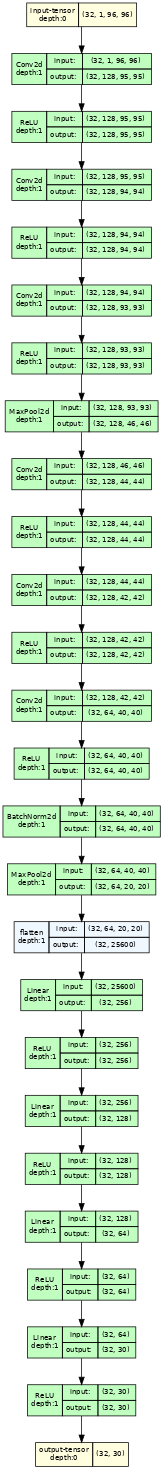

In [36]:
graph.visual_graph

In [37]:
optimizer2 = torch.optim.Adam(facialfeaturesv2.parameters(), lr=0.1)

In [38]:
training_loop(facialfeaturesv2, optimizer2, epochs=40, batch_size=32)

Epoch: 0


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch: 0 | Loss (avg): 242.52982 | Test Loss (avg): 47.72332
Epoch: 1
Epoch: 1 | Loss (avg): 47.77199 | Test Loss (avg): 47.73727
Epoch: 2
Epoch: 2 | Loss (avg): 47.76756 | Test Loss (avg): 47.70841
Epoch: 3
Epoch: 3 | Loss (avg): 47.77178 | Test Loss (avg): 47.73679
Epoch: 4
Epoch: 4 | Loss (avg): 47.76543 | Test Loss (avg): 47.73606
Epoch: 5
Epoch: 5 | Loss (avg): 47.77103 | Test Loss (avg): 47.72148
Epoch: 6
Epoch: 6 | Loss (avg): 47.77188 | Test Loss (avg): 47.75064
Epoch: 7
Epoch: 7 | Loss (avg): 47.77090 | Test Loss (avg): 47.75064
Epoch: 8
Epoch: 8 | Loss (avg): 47.76876 | Test Loss (avg): 47.73606
Epoch: 9
Epoch: 9 | Loss (avg): 47.76773 | Test Loss (avg): 47.73476
Epoch: 10
Epoch: 10 | Loss (avg): 47.76700 | Test Loss (avg): 47.73319
Epoch: 11
Epoch: 11 | Loss (avg): 47.77034 | Test Loss (avg): 47.73319
Epoch: 12
Epoch: 12 | Loss (avg): 47.76771 | Test Loss (avg): 47.73319
Epoch: 13
Epoch: 13 | Loss (avg): 47.77235 | Test Loss (avg): 47.73319
Epoch: 14
Epoch: 14 | Loss (avg): 

{'loss': array([242.52982135,  47.77199138,  47.76756226,  47.77177564,
         47.76542916,  47.77103157,  47.77187748,  47.77089652,
         47.76875964,  47.76773206,  47.76700348,  47.77033704,
         47.7677131 ,  47.77234674,  47.76947528,  47.76771495,
         47.76901209,  47.76556931,  47.76611522,  47.77137828,
         47.76943257,  47.7664315 ,  47.76173139,  47.76130778,
         47.76403004,  47.76319445,  47.77095821,  47.77088966,
         47.76333075,  47.765187  ,  47.76418975,  47.76366374,
         47.76966766,  47.76306117,  47.77165104,  47.77030991,
         47.76279843,  47.77058888,  47.76987875,  47.77084263]),
 'val_loss': array([47.72332379, 47.73727237, 47.70840861, 47.73679045, 47.73606017,
        47.72147718, 47.75063731, 47.75063731, 47.73605724, 47.73475653,
        47.73319006, 47.73319006, 47.73319006, 47.73319006, 47.73319006,
        47.73057359, 47.73056774, 47.72725481, 47.72361719, 47.67858812,
        47.72361719, 47.72099875, 47.72052351,

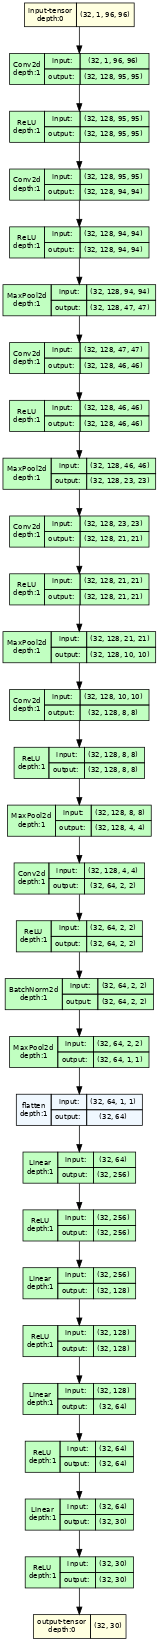

In [39]:
featuresv3 = FacialFeaturesV3()
graph = draw_graph(featuresv3, input_size=(32,1, 96,96))
graph.visual_graph

In [40]:
optimizer3 = torch.optim.Adam(featuresv3.parameters(), lr=0.1)
training_loop(featuresv3,optimizer3, batch_size=32, epochs=12)

Epoch: 0


/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Loss (avg): 13.01924 | Test Loss (avg): 1450.50605
Epoch: 1
Epoch: 1 | Loss (avg): 7.28032 | Test Loss (avg): 7.31235
Epoch: 2
Epoch: 2 | Loss (avg): 6.76239 | Test Loss (avg): 6.35447
Epoch: 3
Epoch: 3 | Loss (avg): 8.69288 | Test Loss (avg): 6.14265
Epoch: 4
Epoch: 4 | Loss (avg): 6.15199 | Test Loss (avg): 6.16402
Epoch: 5
Epoch: 5 | Loss (avg): 6.15281 | Test Loss (avg): 6.16714
Epoch: 6
Epoch: 6 | Loss (avg): 6.15960 | Test Loss (avg): 6.20862
Epoch: 7
Epoch: 7 | Loss (avg): 6.16404 | Test Loss (avg): 6.15237
Epoch: 8
Epoch: 8 | Loss (avg): 6.16772 | Test Loss (avg): 6.16522
Epoch: 9
Epoch: 9 | Loss (avg): 6.15518 | Test Loss (avg): 6.13102
Epoch: 10
Epoch: 10 | Loss (avg): 6.16847 | Test Loss (avg): 6.14888
Epoch: 11
Epoch: 11 | Loss (avg): 6.16209 | Test Loss (avg): 6.16109


{'loss': array([13.01924144,  7.28031927,  6.76238607,  8.69288097,  6.15199383,
         6.15281465,  6.15960335,  6.16404213,  6.16771573,  6.15517658,
         6.1684675 ,  6.16209216]),
 'val_loss': array([1450.50604951,    7.31234679,    6.35447207,    6.14265341,
           6.16402427,    6.16713887,    6.20861899,    6.15237209,
           6.16522448,    6.13101747,    6.14888073,    6.16108841])}

In [41]:
class FacialFeaturesV4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 2)
        self.conv2 = nn.Conv2d(128, 128, 2)
        self.conv3 = nn.Conv2d(128, 128, 2)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv5 = nn.Conv2d(128, 128, 3)
        self.conv6 = nn.Conv2d(128, 64, 3)
        self.batch_norm = nn.BatchNorm2d(64)        
        self.fc1 = nn.Linear(64, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 30)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.pool(x)
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv6(x))
        x = self.batch_norm(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        
        return x

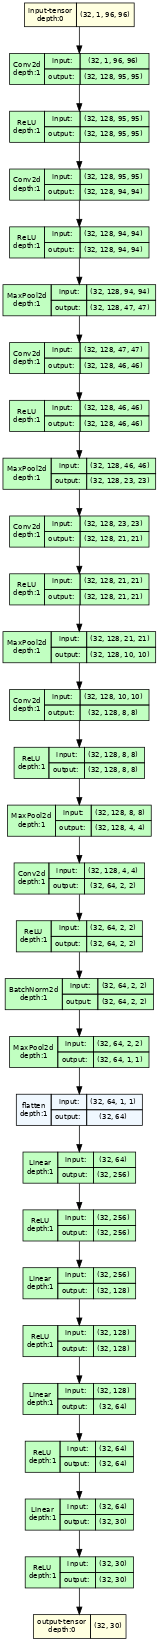

In [42]:
feautresv4 = FacialFeaturesV4()
graph = draw_graph(feautresv4, input_size=(32,1, 96,96))
graph.visual_graph

In [43]:
optimizer4 = torch.optim.Adam(feautresv4.parameters(), lr=0.1)
history = training_loop(feautresv4, optimizer4, batch_size=32, epochs=40)

Epoch: 0
Epoch: 0 | Loss (avg): 41.08411 | Test Loss (avg): 32.81552
Epoch: 1
Epoch: 1 | Loss (avg): 25.80344 | Test Loss (avg): 19.44561
Epoch: 2
Epoch: 2 | Loss (avg): 15.56170 | Test Loss (avg): 12.28125
Epoch: 3
Epoch: 3 | Loss (avg): 9.75504 | Test Loss (avg): 7.72438
Epoch: 4
Epoch: 4 | Loss (avg): 7.08833 | Test Loss (avg): 6.92348
Epoch: 5
Epoch: 5 | Loss (avg): 6.92713 | Test Loss (avg): 6.92550
Epoch: 6
Epoch: 6 | Loss (avg): 6.92974 | Test Loss (avg): 6.92558
Epoch: 7
Epoch: 7 | Loss (avg): 6.92889 | Test Loss (avg): 6.92565
Epoch: 8
Epoch: 8 | Loss (avg): 6.93087 | Test Loss (avg): 6.92544
Epoch: 9
Epoch: 9 | Loss (avg): 6.92728 | Test Loss (avg): 6.92778
Epoch: 10
Epoch: 10 | Loss (avg): 6.92880 | Test Loss (avg): 6.92693
Epoch: 11
Epoch: 11 | Loss (avg): 6.92920 | Test Loss (avg): 6.92670
Epoch: 12
Epoch: 12 | Loss (avg): 6.92852 | Test Loss (avg): 6.92515
Epoch: 13
Epoch: 13 | Loss (avg): 6.93015 | Test Loss (avg): 6.92677
Epoch: 14
Epoch: 14 | Loss (avg): 6.92836 | Test

In [16]:
from sklearn.model_selection import  ValidationCurveDisplay

def plot_valdiation_curve(history):
    epochs = len(history['loss'])
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    # Add in a title and axes labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()
    

In [45]:
len(history['loss']), len(history['val_loss'])

(40, 40)

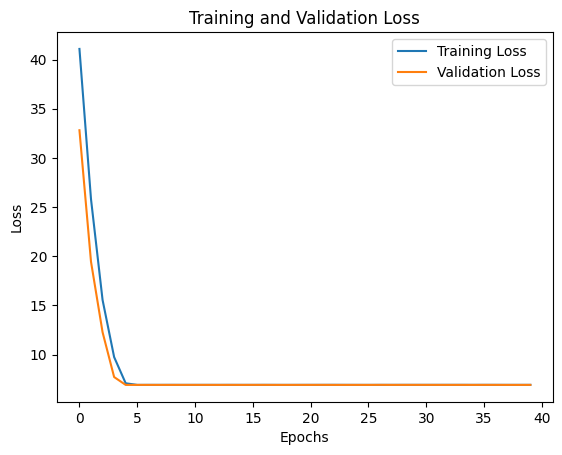

In [46]:
plot_valdiation_curve(history)

In [47]:
class FacialFeaturesV5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 2)
        self.conv2 = nn.Conv2d(128, 128, 2)
        self.conv3 = nn.Conv2d(128, 128, 2)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv5 = nn.Conv2d(128, 128, 3)
        self.conv6 = nn.Conv2d(128, 64, 3)
        self.batch_norm = nn.BatchNorm2d(64)        
        self.fc1 = nn.Linear(64, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.out_layer = nn.Linear(64, 30)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.pool(x)
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv6(x))
        x = self.batch_norm(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.out_layer(x))
        
        return x

In [48]:
featuresv5 = FacialFeaturesV5()

In [49]:
optimizer5 = torch.optim.Adam(featuresv5.parameters(), lr=0.1)

In [50]:
training_loop(featuresv5, optimizer5, epochs=40)

Epoch: 0
Epoch: 0 | Loss (avg): 19.67353 | Test Loss (avg): 9.21232
Epoch: 1
Epoch: 1 | Loss (avg): 6.71327 | Test Loss (avg): 6.93510
Epoch: 2
Epoch: 2 | Loss (avg): 6.22481 | Test Loss (avg): 6.11669
Epoch: 3
Epoch: 3 | Loss (avg): 6.00599 | Test Loss (avg): 6.07702
Epoch: 4
Epoch: 4 | Loss (avg): 5.93590 | Test Loss (avg): 5.92326
Epoch: 5
Epoch: 5 | Loss (avg): 5.90436 | Test Loss (avg): 6.13852
Epoch: 6
Epoch: 6 | Loss (avg): 5.89668 | Test Loss (avg): 5.87001
Epoch: 7
Epoch: 7 | Loss (avg): 5.84557 | Test Loss (avg): 5.78716
Epoch: 8
Epoch: 8 | Loss (avg): 5.93144 | Test Loss (avg): 5.96087
Epoch: 9
Epoch: 9 | Loss (avg): 5.84701 | Test Loss (avg): 5.73307
Epoch: 10
Epoch: 10 | Loss (avg): 5.86862 | Test Loss (avg): 5.80909
Epoch: 11
Epoch: 11 | Loss (avg): 5.89546 | Test Loss (avg): 5.73598
Epoch: 12
Epoch: 12 | Loss (avg): 5.82926 | Test Loss (avg): 6.01958
Epoch: 13
Epoch: 13 | Loss (avg): 5.83433 | Test Loss (avg): 5.78155
Epoch: 14
Epoch: 14 | Loss (avg): 5.81197 | Test Loss

{'loss': array([19.67353036,  6.7132727 ,  6.22480912,  6.00599305,  5.93589685,
         5.90436312,  5.89667909,  5.84556959,  5.93144377,  5.84700683,
         5.86861776,  5.89546035,  5.82926349,  5.8343345 ,  5.81197455,
         5.81094037,  5.78592573, 23.83818201, 15.81792781,  7.28968662,
         4.06707565,  3.82609916,  3.8301254 ,  3.82591515,  3.8240015 ,
         3.82377617,  3.82521698,  3.82607873,  3.82781026,  3.82744821,
         3.82739451,  3.82839416,  3.82820974,  3.8292729 ,  3.82559105,
         3.82882035,  3.8275632 ,  3.82672461,  3.82702744,  3.8263581 ]),
 'val_loss': array([ 9.21232258,  6.93510041,  6.11668765,  6.07702391,  5.92326324,
         6.13852037,  5.87001245,  5.787164  ,  5.96086804,  5.73306947,
         5.80908669,  5.73597635,  6.01957811,  5.78155017,  5.88764287,
         5.81154272,  5.92130927, 23.76686207, 10.16188561,  4.98933359,
         3.82491303,  3.82520783,  3.82366665,  3.82434815,  3.82314267,
         3.82491001,  3.82696

In [18]:
class FacialFeaturesV6(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 512, 2)
        self.conv2 = nn.Conv2d(512, 256, 2)
        self.conv3 = nn.Conv2d(256, 128, 2)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv5 = nn.Conv2d(128, 64, 3)
        self.conv6 = nn.Conv2d(64, 32, 3)
        self.batch_norm_l = nn.BatchNorm2d(128)        
        self.batch_norm_m = nn.BatchNorm2d(64)        
        self.batch_norm = nn.BatchNorm2d(32)        
        self.fc1 = nn.Linear(32, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.out_layer = nn.Linear(64, 30)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.batch_norm_l(x)
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.pool(x)
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv6(x))
        x = self.batch_norm(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.out_layer(x))
        
        return x

In [77]:
featuresv6 = FacialFeaturesV6()

In [78]:
optimizer6 = torch.optim.Adam(featuresv6.parameters(), lr=0.1)

In [79]:
history = training_loop(featuresv6, optimizer6, epochs=40)

Epoch: 0


/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Loss (avg): 14.23563 | Test Loss (avg): 7.24833
Epoch: 1
Epoch: 1 | Loss (avg): 7.25797 | Test Loss (avg): 5.88774
Epoch: 2
Epoch: 2 | Loss (avg): 6.03574 | Test Loss (avg): 6.11498
Epoch: 3
Epoch: 3 | Loss (avg): 5.73272 | Test Loss (avg): 5.14298
Epoch: 4
Epoch: 4 | Loss (avg): 6.16806 | Test Loss (avg): 5.26388
Epoch: 5
Epoch: 5 | Loss (avg): 5.29887 | Test Loss (avg): 5.05215
Epoch: 6
Epoch: 6 | Loss (avg): 5.10479 | Test Loss (avg): 5.09604
Epoch: 7
Epoch: 7 | Loss (avg): 5.07239 | Test Loss (avg): 5.00418
Epoch: 8
Epoch: 8 | Loss (avg): 5.04081 | Test Loss (avg): 4.98977
Epoch: 9
Epoch: 9 | Loss (avg): 5.03336 | Test Loss (avg): 4.95080
Epoch: 10
Epoch: 10 | Loss (avg): 5.01408 | Test Loss (avg): 4.95322
Epoch: 11
Epoch: 11 | Loss (avg): 5.01628 | Test Loss (avg): 5.10553
Epoch: 12
Epoch: 12 | Loss (avg): 4.99631 | Test Loss (avg): 5.00144
Epoch: 13
Epoch: 13 | Loss (avg): 4.99995 | Test Loss (avg): 394134.15391
Epoch: 14
Epoch: 14 | Loss (avg): 4.96874 | Test Loss (av

Top models were V6  & V5, 

In [82]:
def save_model(model, name):
    torch.save(model.state_dict(), f'./models/{name}')

In [17]:
def load_model(model, name):
    model.load_state_dict(torch.load(f'./models/{name}'))

In [84]:
save_model(featuresv5, 'features_v5_2')

In [85]:
save_model(featuresv6, 'features_v6_2')

Now we have two models to evaluate, we need to setup a preprocessing pipeline for test data to evaluate our model. 

Images in the wild come in varying shapes and sizes with varying colour channels. Our model is designed to make predictions on 96x96 images with 1 color channel. Additionally, our model can only handle a single person in the frame for detection. 

To solve we'll use opencv HAAR to detect faces, 
Crop those faces out into 96x96 images, then we'll run the model on the crops. 
Finally, we'll scale the model's output relative to the image/location in the original image. 

In [21]:
import cv2 
import numpy as np
from PIL import Image, ImageOps

In [22]:
def preprocess_image(image):
    gray_img = ImageOps.grayscale(image)
    return gray_img

def cv2_detect_faces(image):
    cv_image = np.array(image)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    faces = face_cascade.detectMultiScale(cv_image, scaleFactor=1.1, minNeighbors=5)
    return faces

def extract_and_resize_face(image, bbox):
    x, y, w, h = bbox
    face_roi = image.crop((x, y, x+w, y+h))
    resized_face = face_roi.resize((96, 96), Image.LANCZOS)
    return resized_face, (x, y, w, h)

def rescale_points(points, original_bbox):
    x, y, w, h = original_bbox
    points = points.reshape(-1, 2)  # Assuming points are in the form [x1, y1, x2, y2, ..., xN, yN]
    rescaled_points = points * [w/96.0, h/96.0]  # Scale points to the original face size
    rescaled_points += [x, y]  # Adjust to the original image position
    return rescaled_points


In [23]:
from torchvision import transforms

In [24]:
# Define the transform to normalize the image and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

def predict_facial_features(model, face):
    face = transform(face).unsqueeze(0)
    model.eval()
    with torch.inference_mode():
        predicted_points = model(face)
    return predicted_points

In [90]:
test_img = Image.open('data/test/test_img.jpg')

In [91]:
loaded_model = FacialFeaturesV5()
load_model(loaded_model, 'features_v5')

In [92]:
print(loaded_model)

FacialFeaturesV5(
  (conv1): Conv2d(1, 128, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=64, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (out_layer): Linear(in_features=64, out_features=30, bias=True)
  (relu): ReLU()
)


In [63]:
from PIL import ImageDraw
def draw_landmarks(image, landmarks):
    draw = ImageDraw.Draw(image)
    for point_arr in landmarks:
        print("doing the job")
        for (x, y) in point_arr:
            print(f'(x,y): ({x}, {y})')
            draw.ellipse((x-2, y-2, x+2, y+2), fill=(255, 0, 0, 0))
    return image

def process_image(model, image):
    gray_im = preprocess_image(image)
    faces = cv2_detect_faces(gray_im)
    redrawn = None
    all_points = []
    downscaled_points = []
    
    for bbox in faces:
        face, original_bbox = extract_and_resize_face(gray_im, bbox)
        plt.imshow(face)
        plt.show()
        face_size = original_bbox
        points = predict_facial_features(model, face)
        points = points.numpy()
        rescaled_points = rescale_points(points, original_bbox)
        all_points.append(rescaled_points)
        downscaled_points.append(points)
    
    
    redrawn = draw_landmarks(image, all_points)  # Draw the landmarks on the image
    
    
    return all_points, image, redrawn, downscaled_points

In [64]:
test_points, im = process_image(loaded_model, test_img)

NameError: name 'loaded_model' is not defined

In [95]:
print(test_points)

[[292.12242317 109.44673693]
 [236.24858278 108.47554553]
 [281.27483213 109.61984348]
 [304.07943916 108.82029951]
 [245.89255345 109.77891207]
 [222.51597679 108.80500913]
 [276.47829175  95.38731503]
 [313.45137787  96.43303716]
 [249.89482701  95.96797252]
 [211.54189509  97.3099997 ]
 [264.14928484 149.34128261]
 [287.32322598 169.71625137]
 [239.45185041 170.75889111]
 [263.39098537 165.40258908]
 [264.63842499 173.9837811 ]]


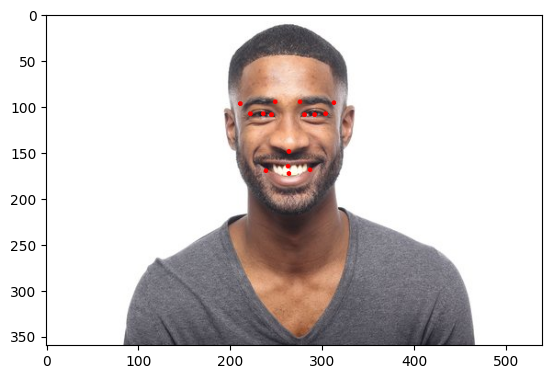

In [96]:
plt.imshow(im)
plt.show()

In [97]:
print(test_points[0].shape)

(2,)


[[65.95917  37.927364 30.901072 37.31799  59.152836 38.03598  73.46161
  37.534306 36.95219  38.135788 22.284534 37.52471  56.14324  29.105766
  79.34204  29.761906 39.46342  29.4701   15.398836 30.312157 48.407394
  62.959236 62.947906 75.74353  32.910965 76.397736 47.9316   73.03692
  48.714306 78.421196]]


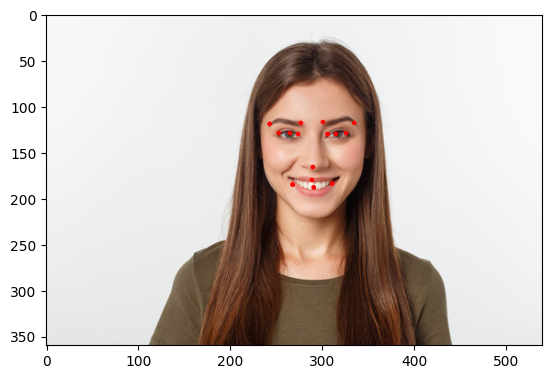

In [98]:
test_img = Image.open('data/test/white_pepo.jpg')
test_poins, img = process_image(loaded_model, test_img)
plt.imshow(img)
plt.show()

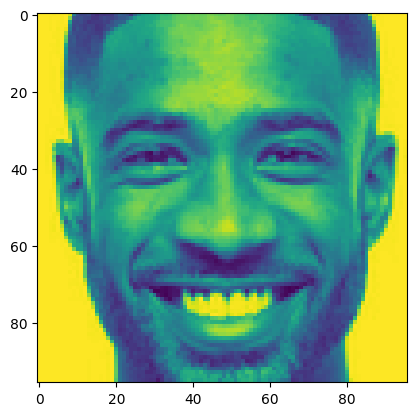

doing the job
(x,y): (292.24873447418213, 109.45839166641235)
(x,y): (236.1278738975525, 108.63457763195038)
(x,y): (280.3520106077194, 109.13077628612518)
(x,y): (303.6368145942688, 109.0572669506073)
(x,y): (245.97371101379395, 109.13707482814789)
(x,y): (222.51369082927704, 109.54323959350586)
(x,y): (276.1941338777542, 96.05548942089081)
(x,y): (314.1015989780426, 95.64457947015762)
(x,y): (250.5736347436905, 96.35427194833755)
(x,y): (211.97089511156082, 97.91845345497131)
(x,y): (263.93100023269653, 149.31703078746796)
(x,y): (287.6456857919693, 169.96045970916748)
(x,y): (238.7618317604065, 170.0025188922882)
(x,y): (262.61379635334015, 165.48571038246155)
(x,y): (264.6082880496979, 173.73205828666687)


ValueError: too many values to unpack (expected 2)

In [53]:
test_img = Image.open('data/test/test_img.jpg')
test_points, img = process_image(features_loaded, test_img)
plt.imshow(img[0])
plt.show()

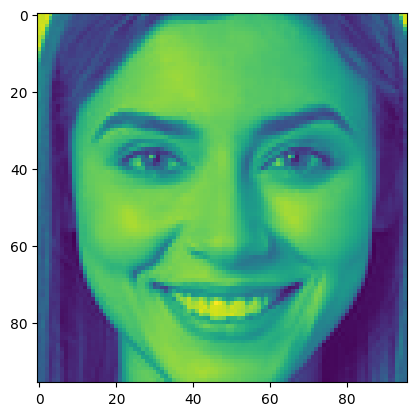

doing the job
(x,y): (315.93023109436035, 130.5310983657837)
(x,y): (265.31141567230225, 129.7880504131317)
(x,y): (305.19985270500183, 130.23560214042664)
(x,y): (326.20183277130127, 130.16929960250854)
(x,y): (274.1919746398926, 130.24128317832947)
(x,y): (253.03195643424988, 130.60762786865234)
(x,y): (301.4496109485626, 118.44220614433289)
(x,y): (335.6406579017639, 118.07158148288727)
(x,y): (278.3409254550934, 118.71169626712799)
(x,y): (243.52276813983917, 120.1225266456604)
(x,y): (290.38874530792236, 166.48202776908875)
(x,y): (311.7784616947174, 185.1015911102295)
(x,y): (267.68714237213135, 185.13952684402466)
(x,y): (289.200679063797, 181.0655426979065)
(x,y): (290.999632358551, 188.50342512130737)


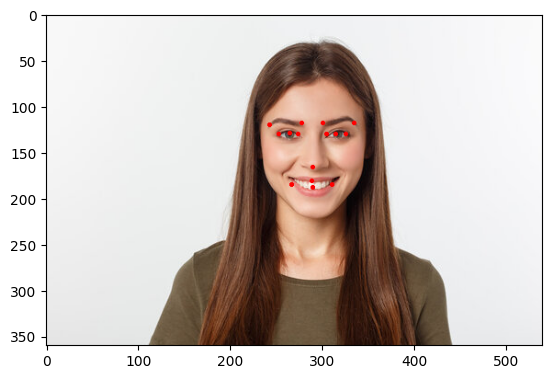

In [55]:
test_img = Image.open('data/test/white_pepo.jpg')
test_poins, img, r, d = process_image(features_loaded, test_img)
plt.imshow(img)
plt.show()

In [19]:
features_loaded = FacialFeaturesV6()

In [20]:
load_model(features_loaded, 'features_v6_2')

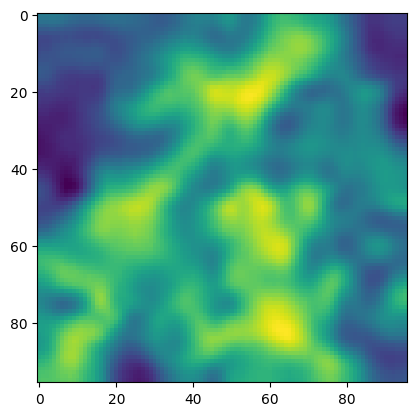

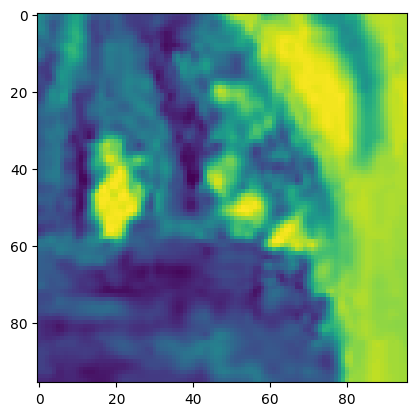

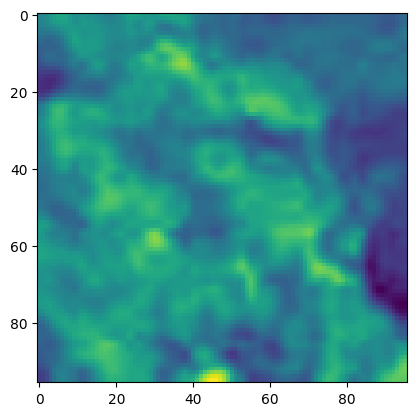

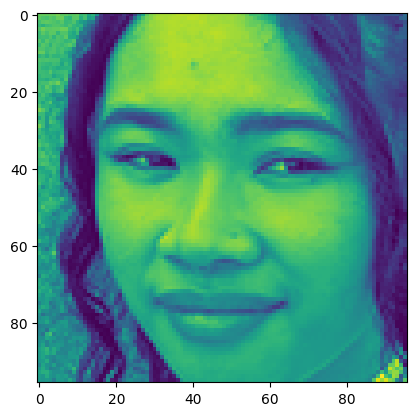

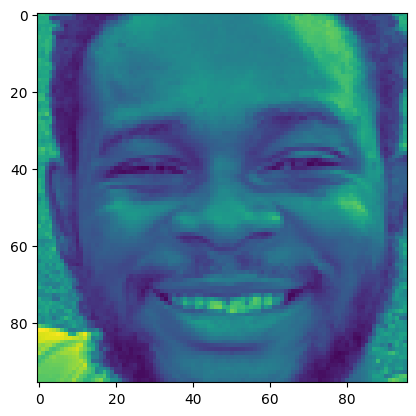

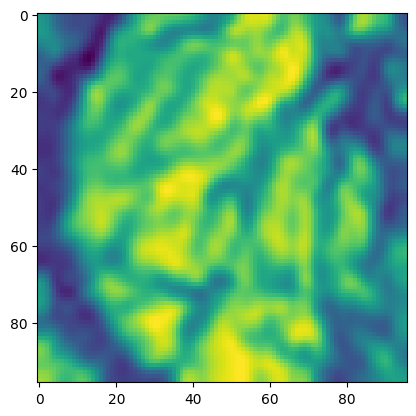

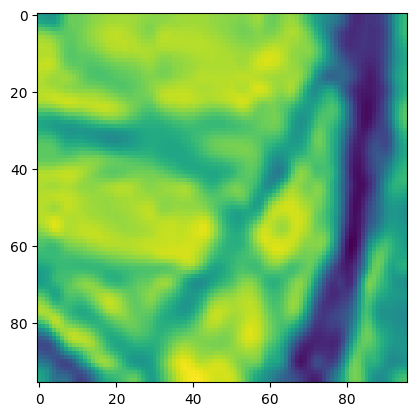

doing the job
(x,y): (1396.8854058583577, 117.27397505442302)
(x,y): (1387.3485275904338, 117.13398051261902)
(x,y): (1394.8637403647106, 117.21830185254414)
(x,y): (1398.8206351598103, 117.20581007003784)
(x,y): (1389.021676381429, 117.2193721930186)
(x,y): (1385.0350062847137, 117.28839365641277)
(x,y): (1394.1571730772655, 114.99635767936707)
(x,y): (1400.5989645322163, 114.92652984460194)
(x,y): (1389.8033627669017, 115.04713118076324)
(x,y): (1383.2434200843174, 115.31293980280559)
(x,y): (1392.0732418696086, 124.04733856519063)
(x,y): (1396.1031884352367, 127.55537223815918)
(x,y): (1387.7961282730103, 127.56251955032349)
(x,y): (1391.8494033018749, 126.79495731989542)
(x,y): (1392.1883365313213, 128.19629748662314)
doing the job
(x,y): (2286.274013519287, 170.70917320251465)
(x,y): (2264.265832901001, 170.38610887527466)
(x,y): (2281.6086316108704, 170.5806965827942)
(x,y): (2290.73992729187, 170.55186939239502)
(x,y): (2268.1269454956055, 170.58316659927368)
(x,y): (2258.926937

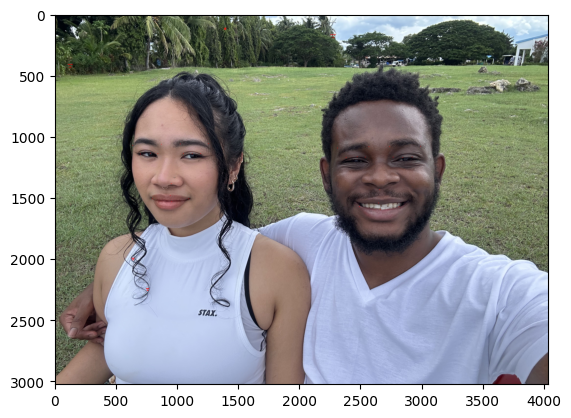

In [65]:
img = Image.open('./data/test/IMG_2643.jpg')
points, im, redrawn, downscaled = process_image(features_loaded, img)
plt.imshow(redrawn)
plt.show()

In [57]:
print(len(points))

0
